In [2]:
import pandas as pd
import numpy as np
np.set_printoptions(suppress=True, precision=3, threshold=np.inf)

f_xi = pd.read_csv('f(xi).csv', index_col=False)
xi = pd.read_csv('xi.csv', index_col=False)
arr = np.array([xi['xi'],f_xi['f(xi)']])
arr

array([[  -8.   ,   -7.667,   -7.333,   -7.   ,   -6.667,   -6.333,
          -6.   ,   -5.667,   -5.333,   -5.   ,   -4.667,   -4.333,
          -4.   ,   -3.667,   -3.333,   -3.   ,   -2.667,   -2.333,
          -2.   ,   -1.667,   -1.333,   -1.   ,   -0.667,   -0.333,
           0.   ,    0.333,    0.667,    1.   ,    1.333,    1.667,
           2.   ,    2.333,    2.667,    3.   ,    3.333,    3.667,
           4.   ,    4.333,    4.667,    5.   ,    5.333,    5.667,
           6.   ,    6.333,    6.667,    7.   ,    7.333,    7.667,
           8.   ],
       [-336.   , -283.963, -237.037, -195.   , -157.63 , -124.704,
         -96.   ,  -71.296,  -50.37 ,  -33.   ,  -18.963,   -8.037,
           0.   ,    5.37 ,    8.296,    9.   ,    7.704,    4.63 ,
          -0.   ,   -5.963,  -13.037,  -21.   ,  -29.63 ,  -38.704,
         -48.   ,  -57.296,  -66.37 ,  -75.   ,  -82.963,  -90.037,
         -96.   , -100.63 , -103.704, -105.   , -104.296, -101.37 ,
         -96.   ,  -87.963,  

In [3]:
arr_co_piaty = np.array([arr[0][4::5], arr[1][4::5]])
arr_co_piaty

array([[  -6.667,   -5.   ,   -3.333,   -1.667,    0.   ,    1.667,
           3.333,    5.   ,    6.667],
       [-157.63 ,  -33.   ,    8.296,   -5.963,  -48.   ,  -90.037,
        -104.296,  -63.   ,   61.63 ]])

In [23]:
def lagrange(x_n, x_i_n, x):
    l_s = np.zeros(len(x_i_n))
    result = 0
    for i, f_i in enumerate(x_i_n):
        l_s[i] = f_i
        for j, x_m in enumerate(x_n):
            if j != i:
                l_s[i] *= (x - x_m) / (x_n[i] - x_m)
        result += l_s[i]

    return result



In [24]:
val = -7.667
lagrange(arr_co_piaty[0], arr_co_piaty[1], val)

-283.82181105248037

In [25]:
def mse(x, y):
    return sum([(xi - yi) ** 2 for xi, yi in zip(x, y)]) / len(x)

predictions = [lagrange(arr_co_piaty[0], arr_co_piaty[1], x) for x in arr[0]]

mse(predictions, arr[1])

0.005866458936761533

### B - interpolacja funkcji y = 1 / (1 + x^2)

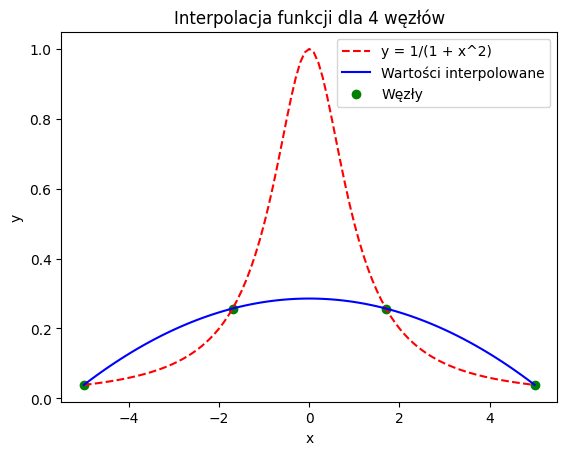

Mean squared error: 0.060132548986221133


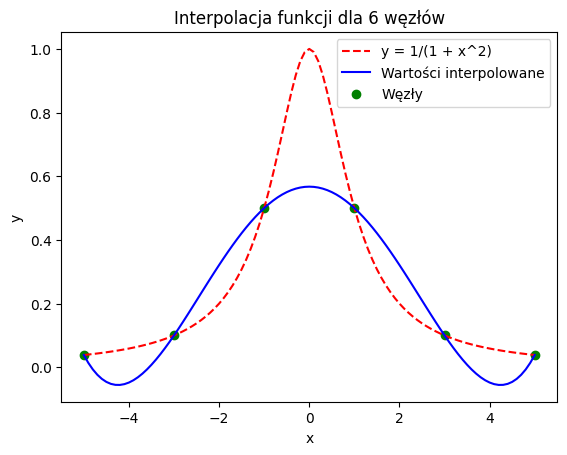

Mean squared error: 0.021134854385839473


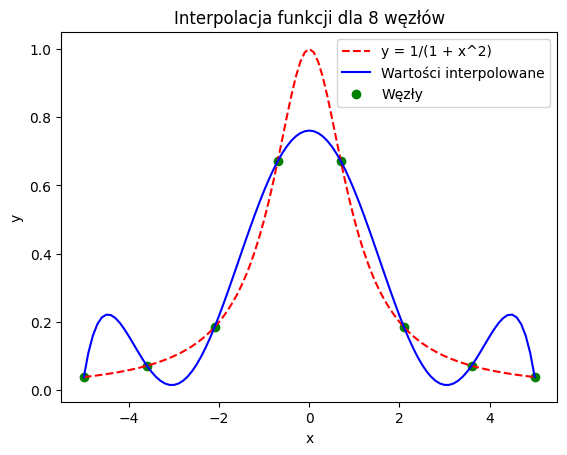

Mean squared error: 0.010542764560581277


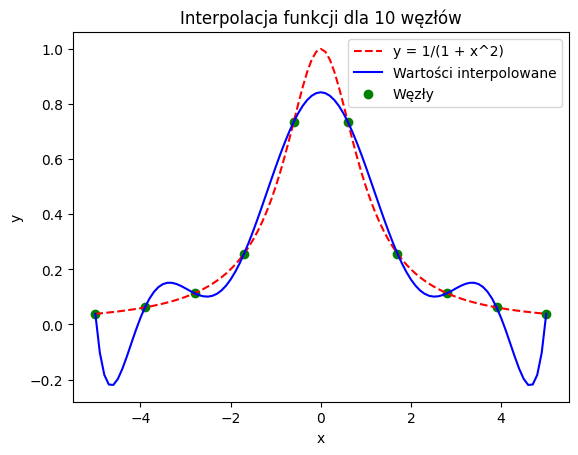

Mean squared error: 0.009960347614234503


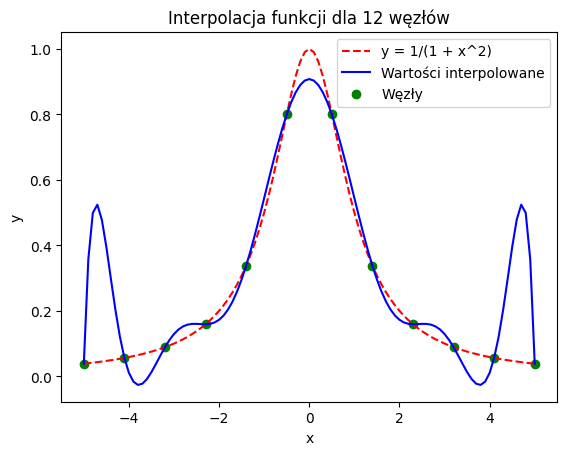

Mean squared error: 0.02017764642460195


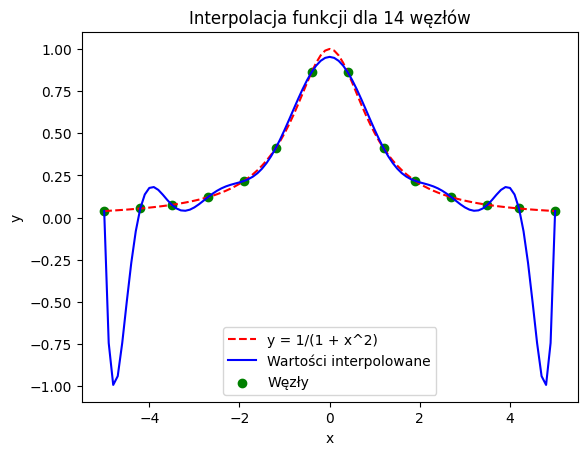

Mean squared error: 0.07456536713352988


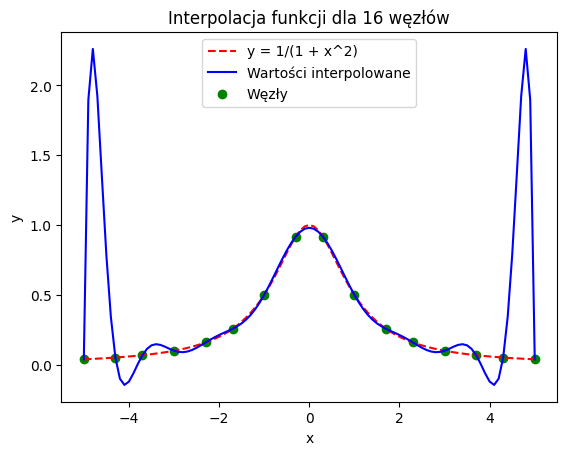

Mean squared error: 0.2844276355438658


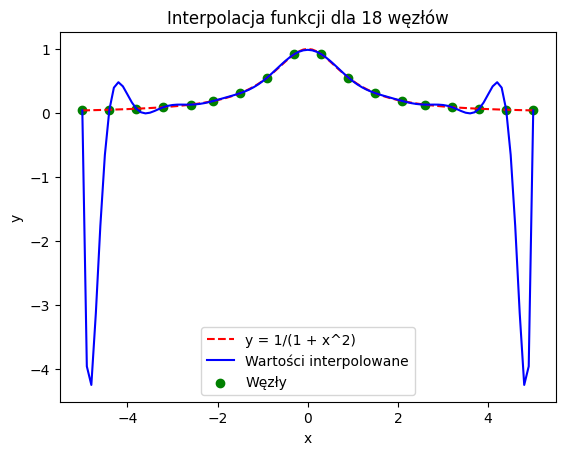

Mean squared error: 0.9675787394424104


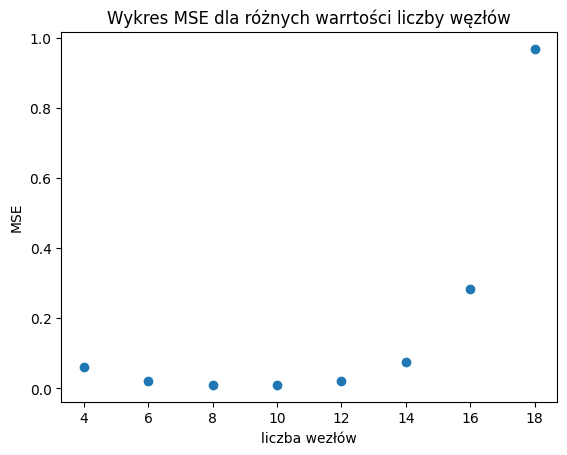

In [51]:
import matplotlib.pyplot as plt

x_and_y = pd.read_csv('zadanie.csv')
x = x_and_y['x'].to_numpy()
y = x_and_y['y'].to_numpy()

nodes_num = [4, 6, 8, 10, 12, 14, 16, 18]
mses = []

for nodes in nodes_num:
    idx = np.round(np.linspace(0, len(x) - 1, nodes)).astype(int)
    nodes_x = x[idx]
    nodes_y = y[idx]

    predictions = np.array([lagrange(nodes_x, nodes_y, x_i) for x_i in x])

    m_s_e = mse(predictions, y)
    mses.append(m_s_e)
    

    plt.plot(x, y, 'r--', label = 'y = 1/(1 + x^2)')
    plt.plot(x, predictions, 'b', label = 'Wartości interpolowane')
    plt.scatter(nodes_x, nodes_y, c='g', label = 'Węzły')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Interpolacja funkcji dla ' + str(nodes) + ' węzłów')
    plt.legend()
    plt.show()
    plt.clf()

    print('Mean squared error:',m_s_e)

plt.scatter(nodes_num, mses)
plt.xlabel('liczba wezłów')
plt.ylabel('MSE')
plt.title('Wykres MSE dla różnych warrtości liczby węzłów')
plt.show()